# VarianceThreshold


## Load Packages

In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime as dt

# Scikit-Learn packages
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

## Load Dataset and Process
Import datasets from pickle

### Data from MinMaxScaler()

In [2]:
X_train_minmax, X_test_minmax, y_train, y_test = pickle.load( open( "../pickles/MinMaxScaler_20210711_181758.pickle", "rb" ) )

### Data from StandardScaler()

In [3]:
X_train_std, X_test_std, y_train, y_test = pickle.load( open( "../pickles/StandardScaler_20210711_181800.pickle", "rb" ) )

### Data from RobustScaler()

In [4]:
X_train_rob, X_test_rob, y_train, y_test = pickle.load( open( "../pickles/RobustScaler_20210711_181801.pickle", "rb" ) )

## Low-variance Determination
Run VarianceThreshold with different threshold values. Determine how many features are below / above the threshold.

In [5]:
def loopthreshold(data, stepsize):
    """Tests different thresholds until no more features fulfill the requirement"""
    resthres = []
    threshold = 0
    while True:
        try:
            selector = VarianceThreshold(threshold=threshold)
            selector.fit_transform(data)
            resthres.append((threshold, sum(selector.get_support())))
            if threshold >= 10:
                print('limit reached')
                break
            threshold += stepsize
        except ValueError:
            print('Input variance too high ', threshold)
            break
    return resthres

Test threshold values the three differently scaled data sets.

In [6]:
mima_threshold = loopthreshold(X_train_minmax, 0.01)
std_threshold = loopthreshold(X_train_std, 0.05)
rob_threshold = loopthreshold(X_train_rob, 0.05)

Input variance too high  0.17
Input variance too high  1.0500000000000003
limit reached


### Plot Data Variance

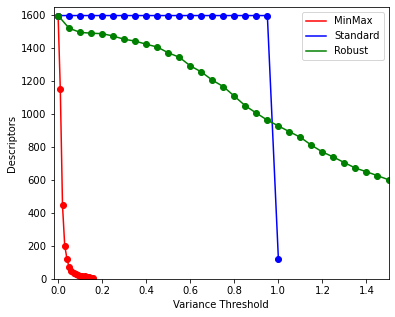

In [7]:
plt.figure(figsize=(6,5))
x_mima, y_mima = zip(*mima_threshold)
x_std, y_std = zip(*std_threshold)
x_rob, y_rob = zip(*rob_threshold)
plt.xlim(-0.02, 1.5)
plt.ylim(0, 1650)
plt.plot(x_mima, y_mima, 'r', label='MinMax')
plt.plot(x_mima, y_mima, 'or')
plt.plot(x_std, y_std,'b', label='Standard')
plt.plot(x_std, y_std, 'ob')
plt.plot(x_rob, y_rob, 'g', label='Robust')
plt.plot(x_rob, y_rob, 'og')
plt.xlabel('Variance Threshold')
plt.ylabel('Descriptors')
plt.legend()
plt.show()

##  Remove Low-Variance Features in the MinMaxScaler Data

In [8]:
#Threshold estimate from plot
threshold = 0.015 
selector = VarianceThreshold(threshold)
selector.fit_transform(X_train_minmax)
X_train_minmax.columns[selector.get_support()]

Index(['AMR', 'apol', 'nAtom', 'nHeavyAtom', 'nH', 'nC', 'nN', 'nP', 'nF',
       'nCl',
       ...
       'L2s', 'L3s', 'P1s', 'P2s', 'E1s', 'E2s', 'E3s', 'Ts', 'Ks', 'Ds'],
      dtype='object', length=787)

#### Get the number of columns with low variance

In [9]:
constant_columns = [column for column in X_train_minmax.columns
                    if column not in X_train_minmax.columns[selector.get_support()]]
print('Nb. with low-variance: ', len(constant_columns))
print('Nb. with sufficient variance: ', sum(selector.get_support()))

Nb. with low-variance:  1088
Nb. with sufficient variance:  787


#### Get the number of columns with sufficient variance

In [10]:
X_train_minmax_var = X_train_minmax.drop(constant_columns,axis=1)
X_test_minmax_var = X_test_minmax.drop(constant_columns,axis=1)
print('Shape of MinMaxScaler train set', X_train_minmax_var.shape)
print('Shape of MinMaxScaler test set',X_test_minmax_var.shape)

Shape of MinMaxScaler train set (614, 787)
Shape of MinMaxScaler test set (154, 787)


##  Remove Low-Variance Features in the StandardScaler Data
Just remove all data with zero variance. As the rest of the data is scaled to variance 1

In [11]:
#Threshold estimate from plot
threshold = 0.0
selector = VarianceThreshold(threshold)
selector.fit_transform(X_train_std)
X_train_std.columns[selector.get_support()]

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'nAtom', 'nHeavyAtom', 'nH',
       'nC', 'nN',
       ...
       'P1s', 'P2s', 'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ks', 'Ds'],
      dtype='object', length=1598)

#### Get the number of columns with low variance

In [12]:
constant_columns = [column for column in X_train_std.columns
                    if column not in X_train_std.columns[selector.get_support()]]
print('Nb. with low-variance: ', len(constant_columns))
print('Nb. with sufficient variance: ', sum(selector.get_support()))

Nb. with low-variance:  277
Nb. with sufficient variance:  1598


#### Get the number of columns with sufficient variance

In [13]:
X_train_std_var = X_train_std.drop(constant_columns,axis=1)
X_test_std_var = X_test_std.drop(constant_columns,axis=1)
print('Shape of StandardScaler train set', X_train_std_var.shape)
print('Shape of StandardScaler test set', X_test_std_var.shape)

Shape of StandardScaler train set (614, 1598)
Shape of StandardScaler test set (154, 1598)


##  Remove Low-Variance Features in the RobustScaler Data

In [14]:
#Threshold estimate from plot
threshold = 0.5
selector = VarianceThreshold(threshold)
selector.fit_transform(X_train_rob)
X_train_rob.columns[selector.get_support()]

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'nAtom', 'nHeavyAtom', 'nH',
       'nC', 'nN',
       ...
       'L1s', 'L2s', 'L3s', 'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ds'],
      dtype='object', length=1372)

#### Get the number of columns with low variance

In [15]:
constant_columns = [column for column in X_train_rob.columns
                    if column not in X_train_rob.columns[selector.get_support()]]
print('Nb. with low-variance: ', len(constant_columns))
print('Nb. with sufficient variance: ', sum(selector.get_support()))

Nb. with low-variance:  503
Nb. with sufficient variance:  1372


#### Get the number of columns with sufficient variance

In [16]:
X_train_rob_var = X_train_rob.drop(constant_columns,axis=1)
X_test_rob_var = X_test_rob.drop(constant_columns,axis=1)
print('Shape of RobustScaler train set', X_train_rob_var.shape)
print('Shape of RobustScaler test set', X_test_rob_var.shape)

Shape of RobustScaler train set (614, 1372)
Shape of RobustScaler test set (154, 1372)


## Export / Save for Next Working Step

### Data from MinMaxScaler

In [17]:
exobj_mima = (X_train_minmax_var, X_test_minmax_var, y_train, y_test)
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = '../pickles/lowthreshold_MinMaxScaler_%s.pickle' %timestamp
filehandler = open(filename, 'wb')
pickle.dump(exobj_mima, filehandler)

### Data from StandardScaler

In [18]:
exobj_std = (X_train_std_var, X_test_std_var, y_train, y_test)
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = '../pickles/lowthreshold_StandardScaler_%s.pickle' %timestamp
filehandler = open(filename, 'wb')
pickle.dump(exobj_std, filehandler)

### Data from RobustScaler

In [19]:
exobj_rob = (X_train_rob_var, X_test_rob_var, y_train, y_test)
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = '../pickles/lowthreshold_RobustScaler_%s.pickle' %timestamp
filehandler = open(filename, 'wb')
pickle.dump(exobj_rob, filehandler)